In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
from collections import Counter
plt.style.use('ggplot')

In [52]:
import pandas as pd
dataset = pd.read_csv(r'C:\Users\rezae\Kuliah\Projek\NLP\Resesi\NLP\NLP\resesi_labelled.csv')
dataset.head()

,Unnamed: 0,url,date,user,tweet,tweet_id,followers_count,friends_count,statuses_count,location,reply_count,retweet_count,like_count,mentioned_user,score,label
0,0,https://twitter.com/junoakita2/status/15961425...,2022-11-25 14:03:43+00:00,junoakita2,"Kalahkan resesi, Binance!\n#Pemenang #Binance ...",1596142589970784256,3481,3231,51689,NaN,0,0,0,NaN,0.994895,neutral
1,1,https://twitter.com/ghazellow/status/159614137...,2022-11-25 13:58:53+00:00,ghazellow,"@kumparan Wahhhh pak, nggak di ralat apa. \n\n...",1596141374906060801,366,799,11254,jakarta,0,0,0,kumparan,0.913776,negative
2,2,https://twitter.com/leesoheey/status/159613952...,2022-11-25 13:51:31+00:00,leesoheey,@LUNERPW ngobrolin dampak resesi 2023 mau ga?,1596139520529137665,657,696,672,NaN,0,0,0,LUNERPW,0.989647,neutral
3,3,https://twitter.com/heelyhs/status/15961386629...,2022-11-25 13:48:06+00:00,heelyhs,Sekarang gw percaya 2023 resesi awoakwoakwk,1596138662915608577,855,848,26756,ID-EN • 잘난,0,0,0,NaN,0.880351,positive
4,4,https://twitter.com/bdleonanda/status/15961385...,2022-11-25 13:47:45+00:00,bdleonanda,Pasar fisik ketat - keseimbangan penawaran dan...,1596138572327030784,5398,4478,20760,"PADANG,INDONESIA",1,0,0,NaN,0.972917,negative


In [5]:
dataset['retweet_count'].nunique()

69

Unique tweets: 9911
All tweets: 10000


[Text(1, 0, 'Actual Tweets'), Text(2, 0, 'Retweets')]

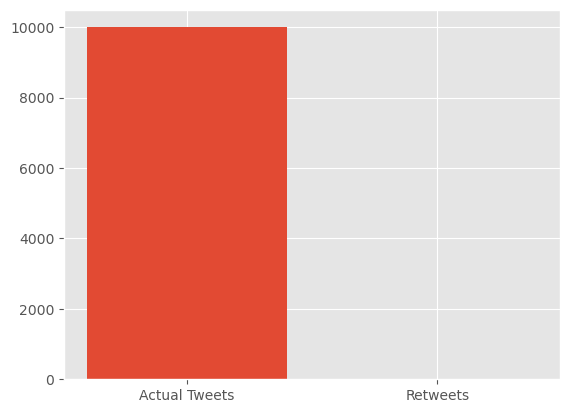

In [4]:
print("Unique tweets: {}".format(len(dataset['tweet'].unique())))
print("All tweets: {}".format(len(dataset['tweet'])))

retweets = []
actual_tweets = []
for user, tweet in zip(dataset['user'], dataset['tweet']):
    match = re.search(r'^\bRT\b', tweet)
    if match == None:
        actual_tweets.append([user,tweet])
    else:
        retweets.append([user,tweet])   

actual_tweets = np.array(actual_tweets)
retweets = np.array(retweets)

plt.bar([1,2], [len(actual_tweets[:,1]), len(retweets[:,1])], align='center')
ax = plt.gca()
ax.set_xticks([1,2])
ax.set_xticklabels(['Actual Tweets', 'Retweets'])

Text(0.5, 1.0, 'Mentioned vs. Total in tweets.csv')

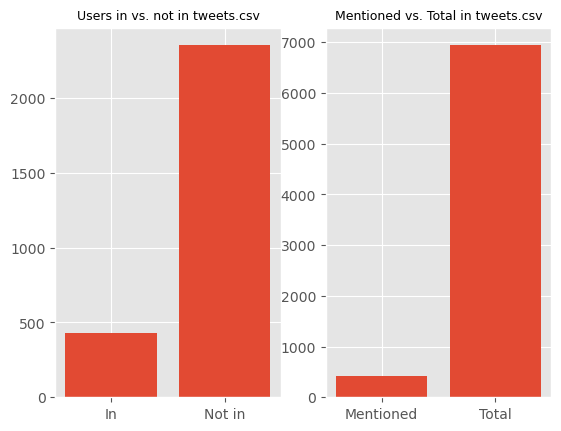

In [15]:
in_set = []
not_in_set = []
for record in actual_tweets:
    match = re.findall(r'@\w*', record[1])
    if match != []:
        for name in match:
            if (name[1:] in dataset['user'].unique()) and (record[0] != name[1:]):
                in_set.append([record[0], name[1:]])
            elif record[0] != name[1:]:
                not_in_set.append([record[0], name[1:]])

in_set = np.array(in_set)
not_in_set = np.array(not_in_set)

fig, ax = plt.subplots(1,2)

ax[0].bar([1,2], [len(np.unique(in_set[:,1])), len(np.unique(not_in_set[:,1]))], align='center')
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(['In', 'Not in'])
ax[0].set_title('Users in vs. not in tweets.csv', fontsize=9)

ax[1].bar([1,2], [len(np.unique(in_set[:,1])), len(dataset['user'].unique())], align='center')
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(['Mentioned', 'Total'])
ax[1].set_title('Mentioned vs. Total in tweets.csv', fontsize=9)

In [16]:
sender_count = Counter(in_set[:,0])
receiver_count = Counter(in_set[:,1])
top_5_senders = sender_count.most_common(5)
top_5_receivers = receiver_count.most_common(5)

print(top_5_senders)
print(top_5_receivers)

[('_SEKNAS_RI', 22), ('surya0377', 18), ('Grivod', 12), ('KuroKaitou', 10), ('arifinpribadi', 10)]
[('jokowi', 133), ('worksfess', 119), ('CNNIndonesia', 84), ('Askrlfess', 55), ('detikcom', 55)]


In [20]:
for name, _ in top_5_receivers:
    print("Username: {} - {}\n".format(name,
            dataset[dataset['user'] == name]['label'].dropna().unique()[0]))

Username: jokowi - neutral

Username: worksfess - negative

Username: CNNIndonesia - neutral

Username: Askrlfess - neutral

Username: detikcom - neutral



In [21]:
graph = nx.Graph()

all_users = list(set(in_set[:,0]) | set(in_set[:,1]))
graph.add_nodes_from(all_users, count=10)
node_colours = []

for node in graph.nodes():
    if node in (set(in_set[:,0]) & set(in_set[:,1])):
        node_colours.append('g')
    elif node in np.unique(in_set[:,0]):
        node_colours.append('r')
    elif node in np.unique(in_set[:,1]):
        node_colours.append('b')

In [27]:

# edges = {}
# occurrence_count = Counter(map(tuple, in_set))
# for (sender, receiver), count in occurrence_count.items():
#     if (receiver, sender) in edges.keys():
#         edges[(receiver, sender)] = edges[(receiver, sender)] + count
#     else:
#         edges[(sender, receiver)] = count
        
# for (sender, receiver), count in edges.items():
#     graph.add_edge(sender, receiver, weight=count)
    
# followers = {}
# tweet_num = {}
# for user in all_users:
#     followers[user] = dataset[dataset['user'] == user]['mentioned_user'].unique()[-1]
#     tweet_num[user] = dataset[dataset['user'] == user]['tweet'].count()

# sizes = [(followers[n] / tweet_num[n]) * 10 for n in graph.nodes()]
# weights = [graph.edge[u][v]['weight']/2 for u, v in graph.edges()]

# plt.figure(figsize=(12,12))
# nx.draw(graph, pos=nx.spring_layout(graph),
#         node_color=node_colours, with_labels=True, width=weights)
# plt.show()

In [30]:
dataset.head()

,Unnamed: 0,url,date,user,tweet,tweet_id,followers_count,friends_count,statuses_count,location,reply_count,retweet_count,like_count,mentioned_user,score,label
0,0,https://twitter.com/junoakita2/status/15961425...,2022-11-25 14:03:43+00:00,junoakita2,"Kalahkan resesi, Binance!\n#Pemenang #Binance ...",1596142589970784256,3481,3231,51689,NaN,0,0,0,NaN,0.994895,neutral
1,1,https://twitter.com/ghazellow/status/159614137...,2022-11-25 13:58:53+00:00,ghazellow,"@kumparan Wahhhh pak, nggak di ralat apa. \n\n...",1596141374906060801,366,799,11254,jakarta,0,0,0,kumparan,0.913776,negative
2,2,https://twitter.com/leesoheey/status/159613952...,2022-11-25 13:51:31+00:00,leesoheey,@LUNERPW ngobrolin dampak resesi 2023 mau ga?,1596139520529137665,657,696,672,NaN,0,0,0,LUNERPW,0.989647,neutral
3,3,https://twitter.com/heelyhs/status/15961386629...,2022-11-25 13:48:06+00:00,heelyhs,Sekarang gw percaya 2023 resesi awoakwoakwk,1596138662915608577,855,848,26756,ID-EN • 잘난,0,0,0,NaN,0.880351,positive
4,4,https://twitter.com/bdleonanda/status/15961385...,2022-11-25 13:47:45+00:00,bdleonanda,Pasar fisik ketat - keseimbangan penawaran dan...,1596138572327030784,5398,4478,20760,"PADANG,INDONESIA",1,0,0,NaN,0.972917,negative


In [162]:
dataset['ct'].nunique()

141

In [287]:
df=dataset[['user', 'mentioned_user']]
df

,user,mentioned_user
1,ghazellow,kumparan
12,kwahyuf,sbyfess
15,71cakes,sangyawnz
18,vitaradoang,VitriDiGiovanni
22,DeckyYM,kumparan
...,...,...
9983,sugandi_h24,idhumhii
9984,ahmadkhabib,Lewandowskyyyy
9986,Bos_Boscang,Retiremyass
9992,jfgltm,HukumDan


In [285]:
ctdf = (df.reset_index()
          .groupby(['mentioned_user'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
ctdf.nunique()

mentioned_user    1255
ct                  24
user                22
dtype: int64

In [290]:
edges = ctdf.groupby(['user','mentioned_user']).agg({'ct':'sum'}).reset_index().query('ct > 1')
edges

,user,mentioned_user,ct
16,0,CiervoOfficial,2
33,0,Leonita_Lestari,2
36,0,MrJenus,3
48,0,ScottLEOWarrior,2
62,0,_SATUMEJA,2
...,...,...,...
1250,28,Askrlfess,28
1251,28,idextratime,30
1252,32,worksfess,35
1253,35,jokowi,44


In [218]:
# edges = edges.sort_values('mentioned_user',ascending=False).head().query(('ct > 10'))
# edges

In [292]:
GOT = nx.from_pandas_edgelist(edges, 
                            source='user',
                            target='mentioned_user',
                            edge_attr='ct' )

In [293]:
print(nx.info(GOT))

Graph with 225 nodes and 203 edges


C:\Users\rezae\AppData\Local\Temp\ipykernel_7368\3832438627.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(GOT))


In [294]:

weighted_degrees = dict(nx.degree(GOT,weight='ct'))
max_degree = max(weighted_degrees.values())

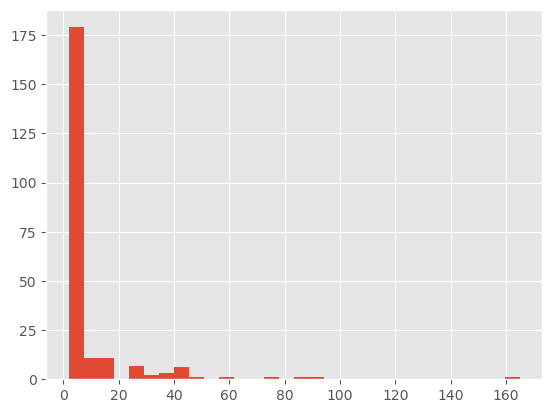

In [295]:
h = plt.hist(weighted_degrees.values(), bins = 30)

In [296]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>10])


In [297]:
print(nx.info(subG))


Graph with 41 nodes and 19 edges


C:\Users\rezae\AppData\Local\Temp\ipykernel_7368\2083595058.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subG))


In [299]:
pos = nx.spring_layout(subG,weight='ct',iterations=20, k = 4)

AttributeError: 'int' object has no attribute 'replace'

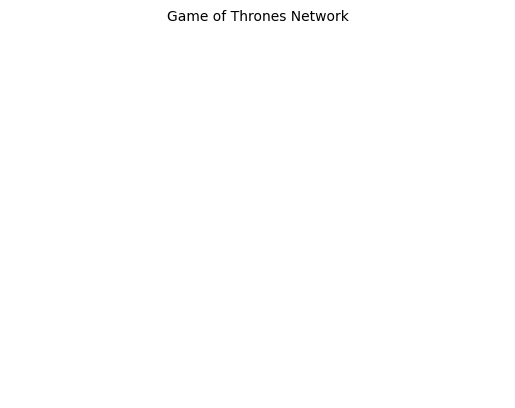

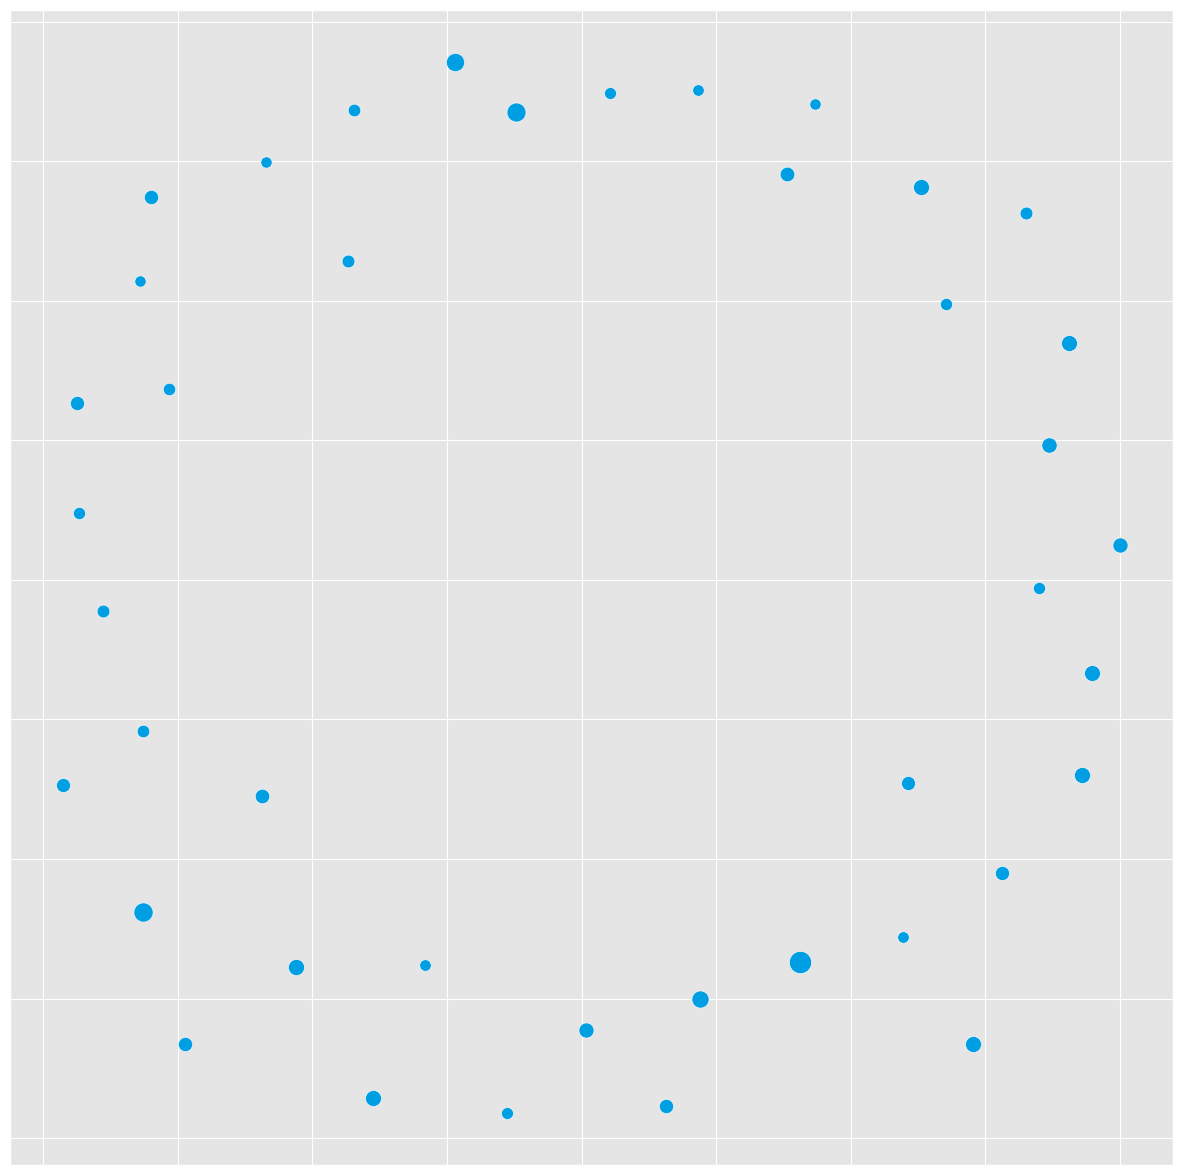

In [300]:

plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 10)
plt.figure(figsize=(15, 15))


for node in subG.nodes():
    size = 20*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>10},font_size=10);

for e in subG.edges(data=True):
    if e[2]['ct']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['ct']/100,edge_color='#707070')

In [227]:

infection_times = {}

In [228]:
def independent_cascade(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = max([e[2]['ct'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['ct'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times

In [234]:


def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.title('Game of Thrones Network, t={}'.format(t),fontsize = 15)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['ct']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['ct']/100,edge_color='#707070')

In [235]:
infection_times = {'CNNIndonesia':-1,'jokowi':-1,'puanmaharani_ri':0}


In [237]:
# for t in range(10):
#     plot_G(subG,pos,infection_times,t)
#     infection_times = independent_cascade(subG,t,infection_times)

In [269]:
df = pd.DataFrame({
    'user':dataset['user'],
    'mentioned_user':dataset['mentioned_user']
})
df['splitted_users'] = df['mentioned_user'].apply(lambda x: x.split(','))

G = nx.DiGraph()
for r in df.iterrows():
    for user in r[1]['splitted_users']:
        G.add_edge(r[1]['user'], user)
nx.draw(G, with_labels=True)

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>